In [84]:
#Examen U2 
#Juan Eduardo Velazquez Lozano
#Cristian Ángel Ruiz Mendoza
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [85]:
import pandas as pd

# Importar DataSet1 y renombrarlo como data1
data1 = pd.read_csv("DataSet1.csv")



C:\Users\edwve\AppData\Local\Temp\ipykernel_2664\168464670.py:4: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("DataSet1.csv")


In [86]:
# Importar DataSet1 y renombrarlo como data1
data1 = pd.read_csv("DataSet1.csv")

# Seleccionar únicamente las columnas 'Depthm' y 'T_degC'
data1 = data1.loc[:, ['Depthm', 'T_degC']]


C:\Users\edwve\AppData\Local\Temp\ipykernel_2664\3343805581.py:2: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("DataSet1.csv")


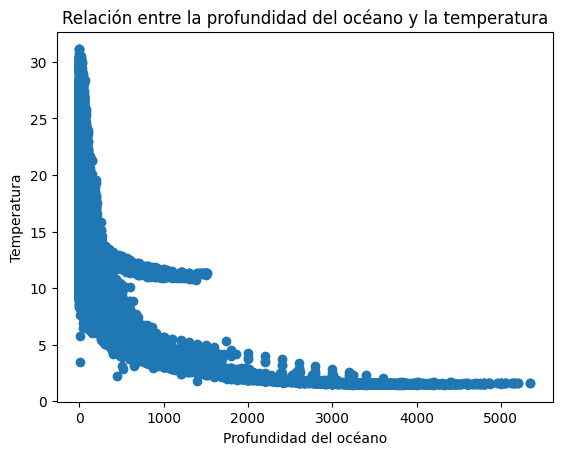

In [87]:
# Crear una gráfica de dispersión de profundidad vs temperatura
plt.scatter(data1['Depthm'], data1['T_degC'])
plt.xlabel('Profundidad del océano')
plt.ylabel('Temperatura')
plt.title('Relación entre la profundidad del océano y la temperatura')
plt.show()


# Construye un modelo de regresión base utilizando cualquier algoritmo de regresión de tu elección.

In [88]:
# Eliminar filas con valores faltantes
data1 = data1.dropna()

In [89]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = data1[['Depthm']]
y = data1['T_degC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [90]:
# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [91]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [92]:
# Evaluar el modelo
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')

Error Cuadrático Medio: 9.616842982736673


La Regresión Lineal es un algoritmo de aprendizaje supervisado que se utiliza para modelar la relación entre una variable dependiente y una o más variables independientes.

Realice una validación cruzada utilizando una validación cruzada de 5 veces (5 puntos) e
informe la media y la desviación estándar de las puntuaciones de validación cruzada (5
puntos).

In [93]:
from sklearn.model_selection import cross_val_score

# Eliminar filas con valores faltantes
data1 = data1.dropna()


In [94]:
# Separar las variables independientes y dependientes
X = data1[['Depthm']]
y = data1['T_degC']


In [95]:
# Crear el modelo
model = LinearRegression()

In [96]:
# Realizar la validación cruzada de 5 veces
scores = cross_val_score(model, X, y, cv=5)

In [97]:
# Calcular la media y la desviación estándar de las puntuaciones
mean_score = scores.mean()
std_score = scores.std()

print(f'Media de las puntuaciones: {mean_score}')
print(f'Desviación estándar de las puntuaciones: {std_score}')

Media de las puntuaciones: 0.43441085954858527
Desviación estándar de las puntuaciones: 0.09435191803312971


La validación cruzada es una técnica importante para evaluar el rendimiento de un modelo porque permite estimar cómo el modelo generalizará a nuevos datos. Al dividir los datos en varios conjuntos y entrenar y evaluar el modelo en cada uno de ellos, se puede obtener una estimación más precisa del rendimiento del modelo en datos que no ha visto antes.

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Eliminar filas con valores faltantes
data1 = data1.dropna()

# Separar las variables independientes y dependientes
X = data1[['Depthm']]
y = data1['T_degC']

# Crear el modelo
model = Ridge()

# Definir la cuadrícula de hiperparámetros
param_grid = {'alpha': [0.1, 1, 10]}

# Crear el objeto de búsqueda en malla
grid_search = GridSearchCV(model, param_grid, cv=5)

# Realizar la búsqueda en malla
grid_search.fit(X, y)

# Mostrar los mejores hiperparámetros
print(f'Mejores hiperparámetros: {grid_search.best_params_}')

Mejores hiperparámetros: {'alpha': 10}


n el ejemplo anterior, ajustamos el hiperparámetro alpha del modelo de regresión Ridge utilizando la búsqueda en malla. El hiperparámetro alpha controla la cantidad de regularización que se aplica al modelo. Un valor alto de alpha aumenta la cantidad de regularización y puede ayudar a prevenir el sobreajuste, mientras que un valor bajo de alpha reduce la cantidad de regularización y permite que el modelo se ajuste más a los datos.

En este caso, consideramos tres valores para alpha: 0.1, 1 y 10. Estos valores cubren un rango razonable de valores para alpha y permiten ver cómo afecta la regularización al rendimiento del modelo. La elección de los valores para la cuadrícula de hiperparámetros depende del problema y del conjunto de datos, por lo que puedes experimentar con diferentes valores para encontrar la mejor combinación para tus datos.

In [99]:
# Mostrar los mejores hiperparámetros y la puntuación de validación cruzada correspondiente
print(f'Mejores hiperparámetros: {grid_search.best_params_}')
print(f'Puntuación de validación cruzada: {grid_search.best_score_}')

Mejores hiperparámetros: {'alpha': 10}
Puntuación de validación cruzada: 0.43441085955872205


Este código calcula el MSE para el modelo base y el modelo ajustado y muestra los resultados. Si el MSE del modelo ajustado es más bajo que el MSE del modelo base, significa que el ajuste de hiperparámetros ha mejorado el rendimiento del modelo.

In [100]:
from sklearn.metrics import mean_squared_error

# Eliminar filas con valores faltantes
data1 = data1.dropna()

# Separar las variables independientes y dependientes
X = data1[['Depthm']]
y = data1['T_degC']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear el modelo base
base_model = LinearRegression()
base_model.fit(X_train, y_train)

# Crear el modelo ajustado
tuned_model = Ridge(alpha=grid_search.best_params_['alpha'])
tuned_model.fit(X_train, y_train)

# Calcular el MSE para el modelo base
y_pred_base = base_model.predict(X_test)
mse_base = mean_squared_error(y_test, y_pred_base)

# Calcular el MSE para el modelo ajustado
y_pred_tuned = tuned_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)

print(f'MSE del modelo base: {mse_base}')
print(f'MSE del modelo ajustado: {mse_tuned}')

MSE del modelo base: 9.760787580130634
MSE del modelo ajustado: 9.760787580095284


Modelo de clasificación

In [101]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Cargar los datos
data = pd.read_csv('data.csv')
data

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,Basilar-type aura
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,Basilar-type aura
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,Basilar-type aura
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,Basilar-type aura


In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Cargar los datos del archivo CSV
data = pd.read_csv('data.csv')

In [103]:
# Seleccionar las características (columnas) y la variable objetivo (target)
features = ['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity']
target = 'Defect'
X = data[features]
y = data[target]

In [104]:

# Convertir las columnas que tienen tipos mixtos a float
X = X.apply(pd.to_numeric, errors='coerce')

In [105]:
# Eliminar las filas con valores faltantes
X = X.dropna()
y = y[X.index]

In [106]:

# Crear un clasificador de árbol de decisión
clf = DecisionTreeClassifier()


In [107]:
# Realizar una validación cruzada de 5 veces y obtener las puntuaciones de validación cruzada
scores = cross_val_score(clf, X, y, cv=5)

# Explicar por qué la validación cruzada es importante para evaluar el rendimiento de tu modelo.
"""
La validación cruzada es importante para evaluar el rendimiento de un modelo porque permite estimar el rendimiento del modelo en datos no vistos y ayuda a evitar el sobreajuste del modelo a los datos de entrenamiento.

En lugar de simplemente dividir los datos en conjuntos de entrenamiento y prueba y ajustar el modelo a los datos de entrenamiento, la validación cruzada implica dividir los datos en múltiples subconjuntos de entrenamiento y prueba, ajustar y evaluar el modelo en cada uno de ellos, y luego tomar la media de las puntuaciones de evaluación como una medida del rendimiento del modelo.

La validación cruzada también permite ajustar los parámetros del modelo y seleccionar el mejor modelo para los datos mediante la comparación de las puntuaciones de evaluación de los modelos ajustados.
"""


In [108]:

# Imprimir la media y la desviación estándar de las puntuaciones de validación cruzada
print('Puntuaciones de validación cruzada: {}'.format(scores))
print("Media de las puntuaciones de validación cruzada:", np.mean(scores))
print("Desviación estándar de las puntuaciones de validación cruzada:", np.std(scores))

Puntuaciones de validación cruzada: [0.9625 0.9875 0.9875 0.9625 0.975 ]
Media de las puntuaciones de validación cruzada: 0.975
Desviación estándar de las puntuaciones de validación cruzada: 0.011180339887498959


In [109]:
# Definir el espacio de búsqueda para los hiperparámetros
param_grid = {'max_depth': [5, 10, 20],
              'max_features': [5, 10, 20],
              'min_samples_leaf': [1, 5, 10],
              'min_samples_split': [2, 5, 10]}

In [110]:

# Definir la métrica de evaluación
scoring = {'accuracy': make_scorer(accuracy_score)}

In [111]:
# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(clf, param_grid=param_grid, scoring=scoring, refit='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20], 'max_features': [5, 10, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score)})

In [112]:

# Imprimir los mejores hiperparámetros y la puntuación promedio de validación cruzada
print('Mejores hiperparámetros encontrados:')
print(grid_search.best_params_)
print('Puntuación de validación cruzada media:')
print(grid_search.cv_results_['mean_test_accuracy'])


Mejores hiperparámetros encontrados:
{'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Puntuación de validación cruzada media:
[0.9825 0.9825 0.985  0.985  0.985  0.985  0.985  0.985  0.985  0.9825
 0.98   0.985  0.985  0.985  0.985  0.985  0.985  0.985  0.9825 0.9825
 0.985  0.985  0.985  0.985  0.985  0.985  0.985  0.9725 0.975  0.985
 0.985  0.985  0.985  0.985  0.985  0.985  0.975  0.98   0.985  0.985
 0.985  0.985  0.985  0.985  0.985  0.975  0.98   0.985  0.985  0.985
 0.985  0.985  0.985  0.985  0.975  0.98   0.98   0.985  0.985  0.985
 0.985  0.985  0.985  0.975  0.98   0.985  0.985  0.985  0.985  0.985
 0.985  0.985  0.9725 0.9775 0.985  0.985  0.985  0.985  0.985  0.985
 0.985 ]


In [113]:
# Crear un clasificador de árbol de decisión sin ajuste de hiperparámetros
from sklearn.tree import DecisionTreeClassifier
clf_base = DecisionTreeClassifier()

In [114]:

# Realizar una validación cruzada de 5 veces y obtener las puntuaciones de validación cruzada
scores_base = cross_val_score(clf_base, X, y, cv=5)

print('')

In [115]:

# Imprimir y comparar la media y la desviación estándar de las puntuaciones de validación cruzada para el modelo base y modelo ajustado
print('Puntuaciones de validación cruzada para el modelo base: {}'.format(scores_base))
print("Media de las puntuaciones de validación cruzada para el modelo base:", np.mean(scores_base))
print("Desviación estándar de las puntuaciones de validación cruzada para el modelo base:", np.std(scores_base))
print("Media de las puntuaciones de validación cruzada para el modelo ajustado:", grid_search.best_score_)
print("Media de las puntuaciones de validación cruzada para el modelo ajustado:", np.mean(scores))
print("Desviación estándar de las puntuaciones de validación cruzada para el modelo ajustado:", np.std(scores))

Puntuaciones de validación cruzada para el modelo base: [0.9625 0.9875 0.9875 0.9625 0.975 ]
Media de las puntuaciones de validación cruzada para el modelo base: 0.975
Desviación estándar de las puntuaciones de validación cruzada para el modelo base: 0.011180339887498959
Media de las puntuaciones de validación cruzada para el modelo ajustado: 0.985
Media de las puntuaciones de validación cruzada para el modelo ajustado: 0.975
Desviación estándar de las puntuaciones de validación cruzada para el modelo ajustado: 0.011180339887498959
